<a href="https://githubtocolab.com/alsinmr/WindeschleubaNMRSchool/blob/main/JupyterExercises/Sol5/ex05_T2_4_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spectral Density Functions: T$_2$ Relaxation
### Solution to 2.3

### 1) Imports

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'font.size': 16})
from numpy import pi

### 2) Define Constants

In [24]:
mu0 = 4*pi*1e-7                   #V s / A / m
hbar = 1.05457266e-34             #J s / rad
h = 2*pi*hbar                     #J s
gammaH = 26.7522128e7             #rad / s / T
gammaN = -2.7116e7                #rad / s / T
rNH = 1.1*1e-10                   #m 

### 3) Functions

In [25]:
#Spectral density function (for isotropic tumbling)
    #Call as: Jiso(omega, tau)
    #one of the two inputs can be an array
Jiso = lambda omega, tau: (2/5)*tau/(1+(omega*tau)**2)

### 4) Parameters

In [31]:
B0 = 14.1                          #T
sigma_zz = 0                       #ppm
tauC = 10**np.arange(-12,-5,.01)   #s

omegaI = -B0*gammaH                 #rad/s, 1H Larmor frequency
omegaS = -B0*gammaN                 #rad/s, 15N Larmor frequency

deltaIS = -2*mu0*gammaH*gammaN*hbar/(4*pi)/rNH**3

### 5) Calculate T$_{1S}$ and T$_{2S}$

In [32]:
#s. Eq. (3) on the exercise sheet
    #note that sigma_zz is given in ppm above
R1S = (deltaIS/4)**2 * (Jiso(omegaI-omegaS, tauC) + 3*Jiso(omegaS, tauC) \
                        + 6*Jiso(omegaI+omegaS, tauC)) \
                        + 3/4 * (omegaS*sigma_zz*1e-6)**2 * Jiso(omegaS, tauC)
T1S = 1/R1S

R2S = deltaIS**2/32 * (4*Jiso(0,tauC) + Jiso(omegaI-omegaS,tauC) + 3*Jiso(omegaS,tauC) \
                      + 6*Jiso(omegaI,tauC) + 6*Jiso(omegaI+omegaS,tauC))\
                      + 1/2 *(omegaS*sigma_zz*1e-6)**2 *Jiso(0,tauC) \
                      + 3/8 *(omegaS*sigma_zz*1e-6)**2 * Jiso(omegaS,tauC)

T2S = 1/R2S

### 5) Back-calculate $\tau_c$

In [33]:
#s. Eq. (5) on the exercise sheet
     
tauC_BC = 1/2 * np.sqrt((1/omegaS**2) *(6*T1S/T2S - 7));

<ipython-input-33-a2f7aba870ba>:3: RuntimeWarning: invalid value encountered in sqrt
  tauC_BC = 1/2 * np.sqrt((1/omegaS**2) *(6*T1S/T2S - 7));


### 6) Double Logarithmic Plot of back-calculated $\tau_c$ against input $\tau_c$

(1e-12, 9.772372209554753e-06)

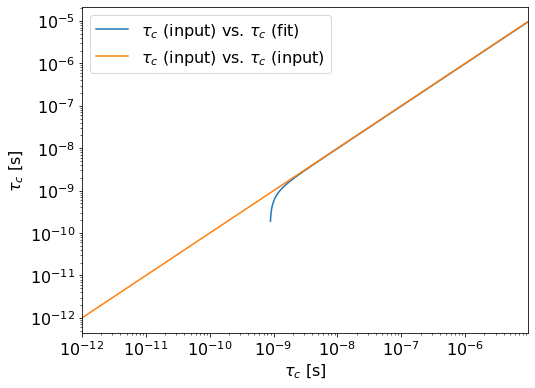

In [40]:
fig,ax=plt.subplots()
fig.set_size_inches([8,6])
ax.loglog(tauC, tauC_BC.real, linewidth=1.5)
ax.loglog(tauC, tauC, linewidth=1.5)
ax.set_xlabel(r"$\tau_c$ [s]")
ax.set_ylabel(r"$\tau_c$ [s]")
ax.legend([r"$\tau_c$ (input) vs. $\tau_c$ (fit)", r"$\tau_c$ (input) vs. $\tau_c$ (input)"],
         loc='upper left')
ax.set_xlim([tauC[0],tauC[-1]])